In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, metrics
from sklearn.cluster import KMeans
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

In [2]:
#load the data
data=pd.read_csv("bankruptcy_HW1_train.csv")

In [3]:
data

,Unnamed: 0,Bankrupt?,Net worth/Assets,Debt ratio %,ROA(C) before interest and depreciation before interest,Per Share Net profit before tax (Yuan ¥)
0,0,0,0.888200,0.111800,0.500951,0.184454
1,1,0,0.847689,0.152311,0.479647,0.166755
2,2,0,0.966895,0.033105,0.516502,0.181969
3,3,0,0.906310,0.093690,0.446302,0.167960
4,4,0,0.882396,0.117604,0.575245,0.179935
...,...,...,...,...,...,...
9257,9257,1,0.831733,0.168267,0.477591,0.171951
9258,9258,1,0.793736,0.206264,0.449358,0.153730
9259,9259,1,0.838023,0.161977,0.437023,0.144037
9260,9260,1,0.779120,0.220880,0.369713,0.131477


In [4]:
#去掉多餘的欄位
data=data.drop(["Unnamed: 0"],axis=1)
data

,Bankrupt?,Net worth/Assets,Debt ratio %,ROA(C) before interest and depreciation before interest,Per Share Net profit before tax (Yuan ¥)
0,0,0.888200,0.111800,0.500951,0.184454
1,0,0.847689,0.152311,0.479647,0.166755
2,0,0.966895,0.033105,0.516502,0.181969
3,0,0.906310,0.093690,0.446302,0.167960
4,0,0.882396,0.117604,0.575245,0.179935
...,...,...,...,...,...
9257,1,0.831733,0.168267,0.477591,0.171951
9258,1,0.793736,0.206264,0.449358,0.153730
9259,1,0.838023,0.161977,0.437023,0.144037
9260,1,0.779120,0.220880,0.369713,0.131477


In [5]:
#kmeans方法
#使用 silhouette_avgs(側影係數)方法決定k的數量
silhouette_avgs=[]
#測試2-5個k的狀況下的績效
ks = range(2,5)
for k in ks:
    kmeans_fit=cluster.KMeans(n_clusters = k ).fit(data)
    cluster_labels=kmeans_fit.labels_
    silhouette_avg=metrics.silhouette_score(data, cluster_labels)
    silhouette_avgs.append(silhouette_avg)

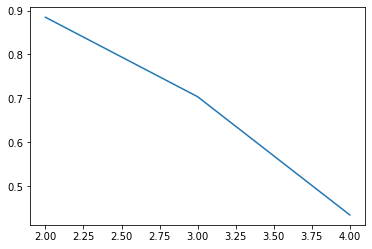

[0.8848679191363125, 0.7035953697986598, 0.4338293424295913]


In [6]:
plt.plot(ks, silhouette_avgs)
plt.show()
print(silhouette_avgs)
#發現在分成2類的時候表現特別好

In [7]:
#分成破產和沒破產兩類
#0是沒破產,1是破產的
kmeans_fit=cluster.KMeans(n_clusters = 2 ).fit(data)
cluster_labels=kmeans_fit.labels_
cluster_labels=pd.DataFrame(cluster_labels, columns = ['predict'])
cluster_labels

,predict
0,0
1,0
2,0
3,0
4,0
...,...
9257,1
9258,1
9259,1
9260,1


In [8]:
#取出value=0,1的inedx，作為篩選index
cluster1_index=cluster_labels["predict"]==1
cluster2_index=cluster_labels["predict"]==0

In [9]:
#破產的
cluster1_data=data[cluster1_index]
cluster1_data

,Bankrupt?,Net worth/Assets,Debt ratio %,ROA(C) before interest and depreciation before interest,Per Share Net profit before tax (Yuan ¥)
114,1,0.750038,0.249962,0.208161,0.101454
180,1,0.824924,0.175076,0.443085,0.153047
192,1,0.775161,0.224839,0.424901,0.146720
319,1,0.807328,0.192672,0.467021,0.157038
341,1,0.885056,0.214983,0.443670,0.162989
...,...,...,...,...,...
9257,1,0.831733,0.168267,0.477591,0.171951
9258,1,0.793736,0.206264,0.449358,0.153730
9259,1,0.838023,0.161977,0.437023,0.144037
9260,1,0.779120,0.220880,0.369713,0.131477


In [10]:
#沒破產的
cluster2_data=data[cluster2_index]
cluster2_data

,Bankrupt?,Net worth/Assets,Debt ratio %,ROA(C) before interest and depreciation before interest,Per Share Net profit before tax (Yuan ¥)
0,0,0.888200,0.111800,0.500951,0.184454
1,0,0.847689,0.152311,0.479647,0.166755
2,0,0.966895,0.033105,0.516502,0.181969
3,0,0.906310,0.093690,0.446302,0.167960
4,0,0.882396,0.117604,0.575245,0.179935
...,...,...,...,...,...
4768,0,0.947758,0.052242,0.542729,0.224750
4769,0,0.922454,0.077546,0.550870,0.211192
4770,0,0.873749,0.126251,0.507288,0.177826
4771,0,0.933821,0.066179,0.581339,0.217670


In [11]:
#破產的
cluster1_data.mean()

Bankrupt?                                                   1.000000
 Net worth/Assets                                           0.814163
 Debt ratio %                                               0.185725
 ROA(C) before interest and depreciation before interest    0.420508
 Per Share Net profit before tax (Yuan ¥)                   0.148348
dtype: float64

In [12]:
#沒破產的
cluster2_data.mean()

Bankrupt?                                                   0.000000
 Net worth/Assets                                           0.889716
 Debt ratio %                                               0.110752
 ROA(C) before interest and depreciation before interest    0.508755
 Per Share Net profit before tax (Yuan ¥)                   0.185692
dtype: float64